 # How to find the sepcies name from the sepat_width ,sepal_height ,prtal_width,petal_height 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=  pd.read_csv("IRIS.csv")

In [3]:
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
94,5.7,3.0,4.2,1.2,Iris-versicolor
95,5.7,2.9,4.2,1.3,Iris-versicolor
96,6.2,2.9,4.3,1.3,Iris-versicolor
97,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  99 non-null     float64
 1   sepal_width   99 non-null     float64
 2   petal_length  99 non-null     float64
 3   petal_width   99 non-null     float64
 4   species       99 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,99.000000,99.000000,99.000000,99.000000
mean,5.475758,3.091919,2.876768,0.790909
std,0.643189,0.478022,1.448351,0.566062
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.000000,3.000000,1.000000
75%,5.900000,3.400000,4.350000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [6]:
df.shape

(99, 5)

# Check for null

In [7]:
df.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

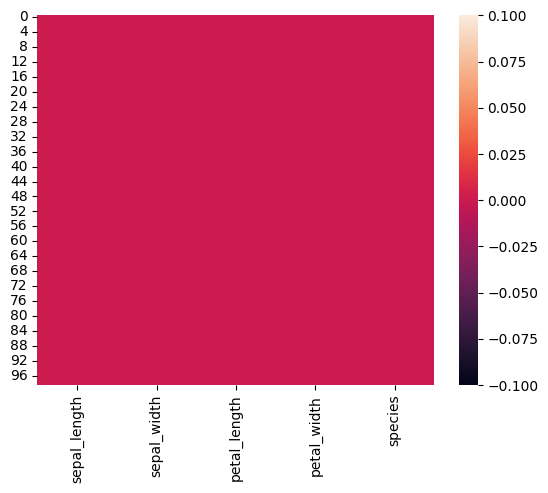

In [8]:
sns.heatmap(df.isnull())
plt.show()

# Find Outlier 

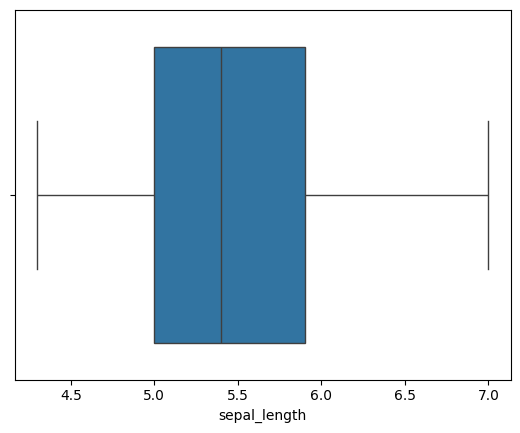

In [9]:
sns.boxplot(x = "sepal_length",data=df) 
plt.show()

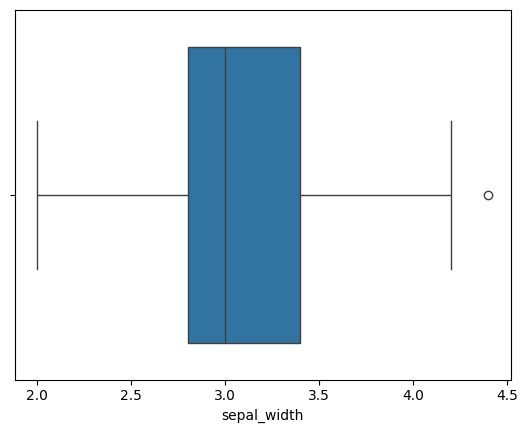

In [10]:

sns.boxplot(x="sepal_width", data=df)
plt.show()


In [11]:
q1 = df["sepal_width"].quantile(0.25)
q3 = df["sepal_width"].quantile(0.75)

In [12]:
q1,q3

(2.8, 3.4)

In [13]:
IQR = q3 - q1

In [14]:
min_range = q1 - (1.5*IQR)
max_range= q3 + (1.5*IQR)

In [15]:
min_range,max_range

(1.8999999999999997, 4.3)

In [16]:
df = df[df["sepal_width"] <= max_range]

In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
94,5.7,3.0,4.2,1.2,Iris-versicolor
95,5.7,2.9,4.2,1.3,Iris-versicolor
96,6.2,2.9,4.3,1.3,Iris-versicolor
97,5.1,2.5,3.0,1.1,Iris-versicolor


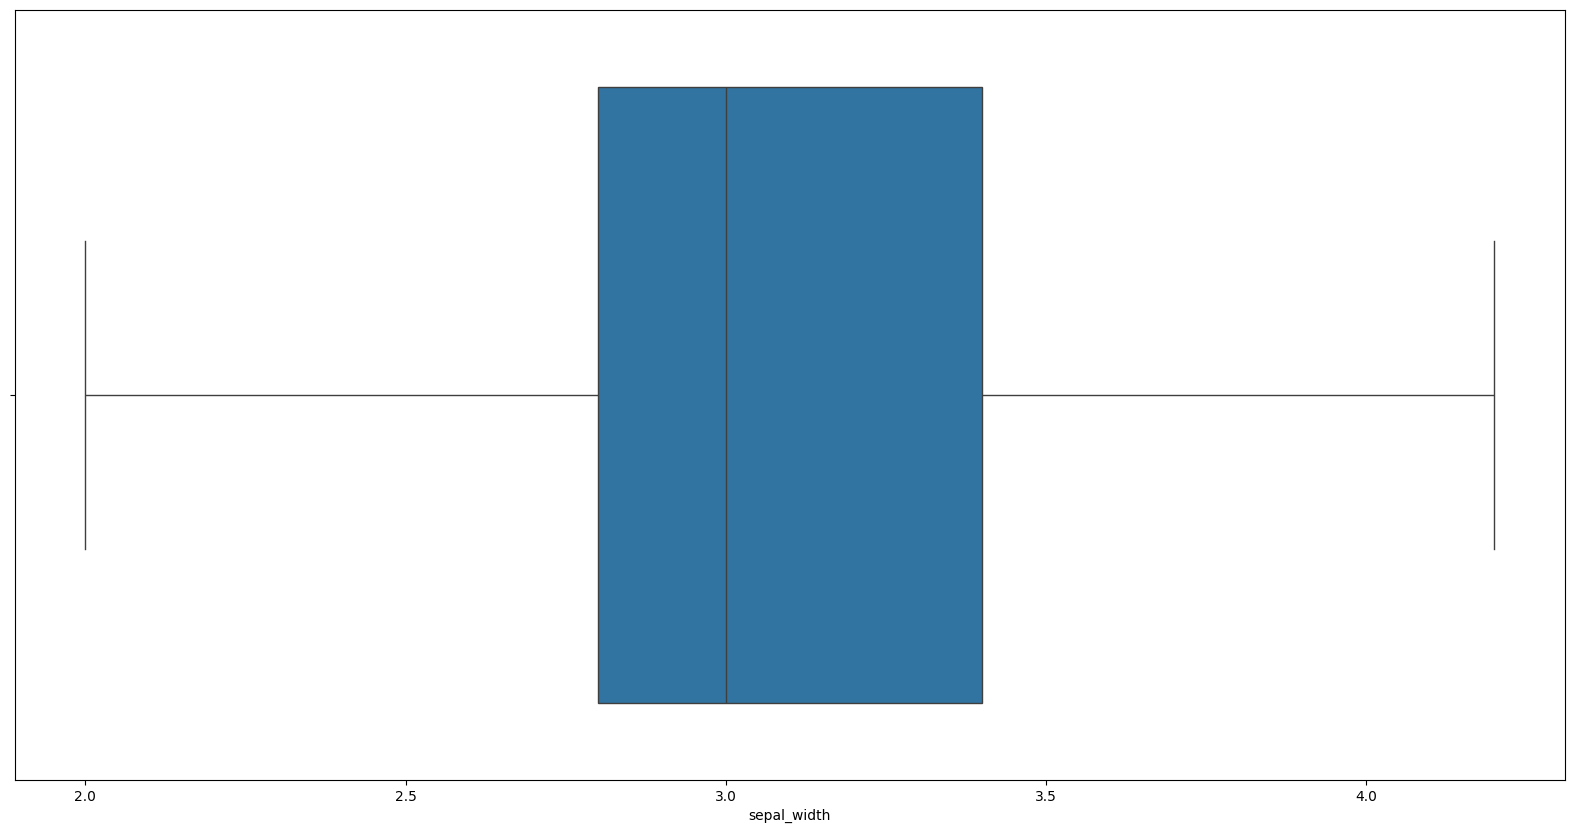

In [18]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = "sepal_width",data=df)
plt.show()

# Separate the input or Output 

In [19]:
x =  df.iloc[:,:-1]#Input for the models

In [20]:
# x

In [21]:
y =  df["species"] #output we want it 

In [22]:
# y

In [23]:
x.ndim


2

In [24]:
# y.unique()  #what are the outputs 

# Scalling 

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x),columns=x.columns)
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.581017,0.917739,-1.034147,-1.053533
1,-0.892162,-0.171104,-1.034147,-1.053533
2,-1.203308,0.264433,-1.103515,-1.053533
3,-1.358881,0.046665,-0.964780,-1.053533
4,-0.736590,1.135508,-1.034147,-1.053533
...,...,...,...,...
93,0.352420,-0.171104,0.908153,0.717415
94,0.352420,-0.388873,0.908153,0.894509
95,1.130284,-0.388873,0.977521,0.894509
96,-0.581017,-1.259947,0.075738,0.540320


In [27]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
94    Iris-versicolor
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
Name: species, Length: 98, dtype: object

# Differentiate Training  and  Testing input 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [30]:
X_train.shape ,X_test.shape

((78, 4), (20, 4))

In [31]:
# X_train

In [32]:
# X_train.shape

In [33]:
# y_train

In [34]:
# y_train.shape

In [35]:
# y_train.unique()

In [36]:
# from sklearn.preprocessing import StandardScaler

In [37]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()


In [40]:
lr.fit(X_train,y_train)


LogisticRegression()

In [41]:
lr.score(X_test,y_test)*100

100.0

In [42]:
lr.score(X_train,y_train)*100

100.0

In [43]:
lr.score(X_test,y_test)

1.0

In [44]:
lr.coef_

array([[ 0.7567968 , -1.20032616,  1.38484785,  1.43185112]])

In [45]:
lr.intercept_

array([0.34086047])

In [46]:
# inp  = [[5.4, 3.9, 1.7, 0.4]]  
# inp = [[6.4,3.2, 4.5,1.5]] #Iris-versicolor
# inp = [[5.4,3.9,1.3,0.4]] #Iris-setosa
inp =[[0.352420,-0.606641,0.838785,0.894509]] # Iris-versicolor



In [47]:
ex  = scaler.transform(inp)  


D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
pred = lr.predict(ex) 

D:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
pred

array(['Iris-versicolor'], dtype=object)

In [50]:
# # Save the model pkl 
# import pickle
# with open('irsi_data.pkl', 'wb') as file:
#     pickle.dump(lr, file)

In [51]:
# with open('scaler.pkl', 'wb') as file:
#     # pickle.dump(scaler, file)

In [52]:
import joblib

In [54]:
# model_filename = 'iris_model_logistic.zip'
# joblib.dump(lr, model_filename)

['iris_model_logistic.zip']

In [56]:
import skl2onnx
from skl2onnx import convert_sklearn
from sklearn.ensemble import RandomForestClassifier

# Assuming 'model' is the trained model
onnx_model = skl2onnx.convert_sklearn(model, initial_types=[('input', FloatTensorType([None, 4]))])

with open("iris_model_logistic.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


ModuleNotFoundError: No module named 'skl2onnx'

In [57]:
scaler_filename = "scaler.pkl"
joblib.dump(scaler, scaler_filename)


['scaler.pkl']